In [1]:
import numpy as np
import pandas as pd
import cycle_time_analys as ana
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette = "pastel")
plt.style.use('seaborn') 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = ana.get_issues_from('JET')

start at:  0
start at:  50
start at:  100
start at:  150
start at:  200
start at:  250


In [119]:
df.columns

Index(['key', 'id', 'summary', 'url', 'issuetype', 'issuetype_id',
       'date_created', 'date_resolution', 'story_points', 'assignee',
       'assignee_full', 'assignee_active', 'status', 'status_id', 'resolution',
       'resolution_id', 'lead_time', 'labels', 'sprint_count', 'statuses',
       'quality', 'date_starting', 'cycle_time'],
      dtype='object')

In [84]:
df

,key,id,summary,url,issuetype,issuetype_id,date_created,date_resolution,story_points,assignee,...,status_id,resolution,resolution_id,lead_time,labels,sprint_count,statuses,quality,date_starting,cycle_time
0,JET-421,474153,Configurar Jest,http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-05-20 16:40:26-04:00,2021-05-24 15:19:02-04:00,2.0,dsagredo,...,10102,Done,10000,3 days 22:38:36,[],1,"[{'from': 'TO DO', 'to': 'DONE', 'date_created...",1,2021-05-24 15:19:02.995000-04:00,-1 days +23:59:59.005000
1,JET-413,470363,Presentacion 1 Patrones,http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-05-18 00:36:24-04:00,2021-05-18 17:20:29-04:00,2.0,cgaeteo,...,10102,Done,10000,0 days 16:44:05,[backend],1,"[{'from': 'TO DO', 'to': 'In Progress', 'date_...",0,2021-05-18 17:18:24.891000-04:00,0 days 00:02:04.109000
2,JET-408,470358,Documentar creación de apk,http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-05-18 00:36:13-04:00,2021-05-23 20:29:48-04:00,4.0,fsilvac,...,10102,Done,10000,5 days 19:53:35,[QA],1,"[{'from': 'TO DO', 'to': 'In Progress', 'date_...",0,2021-05-23 20:16:32.746000-04:00,0 days 00:13:15.254000
3,JET-403,470353,Configurar Flipper,http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-05-18 00:36:01-04:00,2021-05-20 19:29:58-04:00,2.0,rherrerag,...,10102,Done,10000,2 days 18:53:57,[front],1,"[{'from': 'TO DO', 'to': 'In Progress', 'date_...",0,2021-05-20 19:29:51.391000-04:00,0 days 00:00:06.609000
4,JET-397,470347,Documentar Flipper,http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-05-18 00:35:48-04:00,2021-05-20 17:10:58-04:00,5.0,goleat,...,10102,Done,10000,2 days 16:35:10,[QA],1,"[{'from': 'TO DO', 'to': 'In Progress', 'date_...",0,2021-05-18 12:30:19.102000-04:00,2 days 04:40:38.898000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,JET-13,379713,Integrar TEF (Front),http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-01-26 10:05:57-03:00,2021-01-28 10:09:33-03:00,3.0,dsagredo,...,10102,Done,10000,2 days 00:03:36,[],1,"[{'from': 'TO DO', 'to': 'In Progress', 'date_...",0,2021-01-27 09:32:38.972000-03:00,1 days 00:36:54.028000
264,JET-12,379708,Integrar Menu Servicios (front),http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-01-26 10:02:04-03:00,2021-02-04 13:09:43-03:00,2.0,rherrerag,...,10102,Done,10000,9 days 03:07:39,[],1,"[{'from': 'TO DO', 'to': 'DONE', 'date_created...",1,2021-02-04 13:09:43.491000-03:00,-1 days +23:59:59.509000
265,JET-11,379707,Integrar Menú Lateral (Front),http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-01-26 10:01:37-03:00,2021-01-29 13:12:45-03:00,2.0,dsagredo,...,10102,Done,10000,3 days 03:11:08,[],1,"[{'from': 'TO DO', 'to': 'In Progress', 'date_...",0,2021-01-29 12:46:07.429000-03:00,0 days 00:26:37.571000
266,JET-10,379706,Configurar Tab Bar (Front),http://jira.bch.bancodechile.cl:8080/rest/api/...,Task,3,2021-01-26 10:01:05-03:00,2021-01-27 09:31:43-03:00,2.0,dsagredo,...,10102,Done,10000,0 days 23:30:38,[],1,"[{'from': 'TO DO', 'to': 'TO DO', 'date_create...",2,2021-01-26 12:02:13.553000-03:00,0 days 21:29:29.447000


In [105]:
df_sca = df.loc[:,['key','summary','story_points','quality','statuses',
                   'lead_time','cycle_time','date_created','date_resolution',
                   'date_starting']]

In [106]:
df_sca.sort_values(by=['date_created'],inplace=True)

In [107]:
df_sca['date_created_string'] = df_sca['date_created'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [108]:
df_sca['date_starting_string'] = df_sca['date_starting'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [109]:
df_sca['date_created_string']

238    2021-01-12
239    2021-01-12
240    2021-01-12
236    2021-01-12
234    2021-01-12
          ...    
4      2021-05-18
3      2021-05-18
2      2021-05-18
1      2021-05-18
0      2021-05-20
Name: date_created_string, Length: 268, dtype: object

In [110]:
df_sca['date_starting_string'].value_counts()

2021-02-17    19
2021-04-23    18
2021-02-04    10
2021-02-11    10
2021-03-17     7
              ..
2021-02-01     1
2021-01-26     1
2021-03-02     1
2021-05-23     1
2021-02-26     1
Name: date_starting_string, Length: 69, dtype: int64

In [111]:
df_sca['lead_time_num'] = df_sca['lead_time']/ pd.Timedelta('1 day')
df_sca['cycle_time_num'] = df_sca['cycle_time']/ pd.Timedelta('1 day')

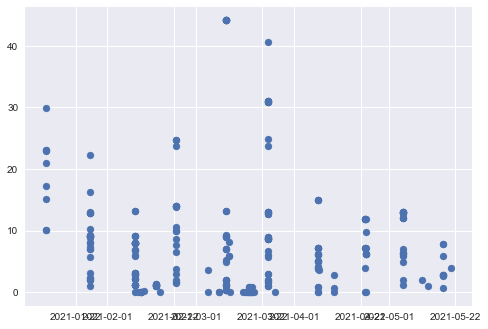

In [112]:
plt.scatter(df_sca['date_created'], df_sca['lead_time_num'])

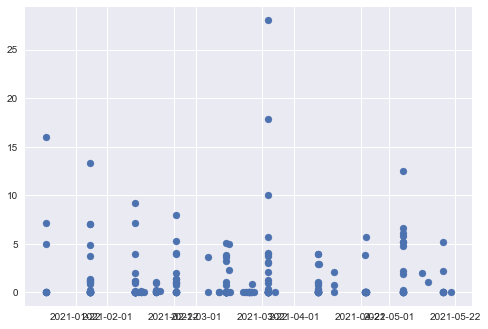

In [113]:
plt.scatter(df_sca['date_created'], df_sca['cycle_time_num'])
#plt.xlim('2021-04-01','2021-04-25')

<AxesSubplot:xlabel='date_starting_string', ylabel='cycle_time_num'>

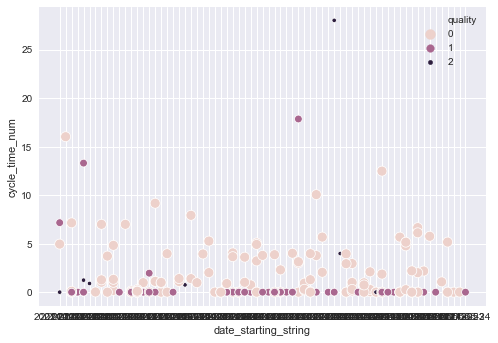

In [114]:
sns.scatterplot(data=df_sca, x="date_starting_string",
                y="cycle_time_num", hue='quality', size="quality", sizes=(100, 20))

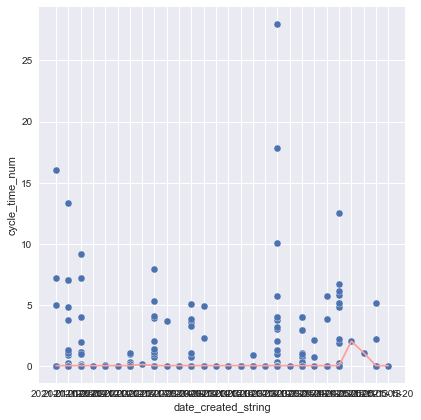

In [115]:
X_plot = df_sca.groupby(by='date_created_string')['cycle_time_num'].apply(lambda x: x.mode().iloc[0]).index
Y_plot = df_sca.groupby(by='date_created_string')['cycle_time_num'].apply(lambda x: x.mode().iloc[0]).values

g = sns.FacetGrid(df_sca, size = 6)
g = g.map(plt.scatter, "date_created_string", "cycle_time_num", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()

In [116]:
df_sca['cycle_time_num'].describe()

count    268.000000
mean       1.241675
std        3.024536
min       -0.000012
25%       -0.000005
50%        0.000394
75%        1.001686
max       28.003601
Name: cycle_time_num, dtype: float64

In [117]:
type(df_sca['date_created'])

pandas.core.series.Series

In [30]:
df_sca['cycle_time_num'].mode()

0   -0.000007
1   -0.000007
2   -0.000007
3   -0.000004
dtype: float64

<AxesSubplot:xlabel='cycle_time_num'>

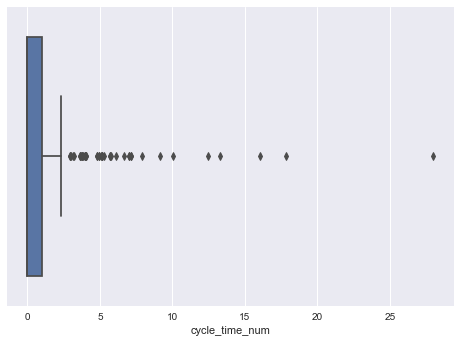

In [29]:
sns.boxplot(data=df_sca, x='cycle_time_num')

In [ ]:
X_plot = df_sca.groupby(by='date_created_string')['cycle_time_num'].apply(lambda x: x.mode().iloc[0]).index
Y_plot = df_sca.groupby(by='date_created_string')['cycle_time_num'].apply(lambda x: x.mode().iloc[0]).values

g = sns.FacetGrid(df_sca, size = 6)
g = g.map(plt.scatter, "date_created_string", "cycle_time_num", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()